In [1]:
# 6. Elaborar un modelo predictivo aplicando el algoritmo Random
# Forest para resolver un problema de clasificación utilizando
# lenguaje Python

# El problema que abordaremos es predecir la temperatura máxima para
# mañana en una determinada ciudad usando un año de datos meteorológicos
# anteriores. Usted usará Seattle, WA, pero también puede buscar datos para
# otra ciudad usando la herramienta de datos climáticos en línea de la NOAA.

# Tenemos acceso a un año de temperaturas máximas históricas, las
# temperaturas de los dos días anteriores y una estimación de un amigo que
# siempre afirma saberlo todo sobre el clima. Este es un problema de
# aprendizaje automático de regresión supervisado. Durante el entrenamiento,
# para usar random forest debemos darle tanto las características como los
# objetivos, y debe aprender a asignar los datos a una predicción.

# Para esto usará los datos meteorológicos para Seattle, WA de 2016 utilizando
# la herramienta de datos climáticos en línea de la NOAA. En general, alrededor
# del 80 % del tiempo dedicado al análisis de datos se dedica a la limpieza y
# recuperación de datos, pero esta carga de trabajo se puede reducir
# encontrando fuentes de datos de alta calidad. La herramienta NOAA es
# sorprendentemente fácil de usar y los datos de temperatura se pueden
# descargar como archivos csv limpios que se pueden analizar. El archivo de
# trabajo se llama temps.csv que encontrará cargado en la plataforma.

# Usted posee las siguientes variables para trabajar:

#- year: 2016 para todos los puntos de datos
#- month: número del mes del año
#- day: número para el día del año
#- week: día de la semana como cadena de caracteres
#- temp_2: temperatura máxima 2 días antes
#- temp_1: temperatura máxima 1 día antes
#- average: temperatura máxima promedio histórica
#- actual: medición de temperatura máxima
#- forecast_noaa: predicción de temperatura máxima de NOAA
#- forecast_acc: predicción de temperatura máxima de AccuWeather
#- forecast_under: predicción de temperatura máxima de Weather Underground
#- friend: la predicción de tu amigo, un número aleatorio entre 20 por debajo del promedio y 20 por encima del promedio


# Realice lo siguiente:


# carga archivo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

df = pd.read_csv('temps.csv')
df.head()


,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [2]:
# 1. Para identificar anomalías, obtenga un resumen estadístico, o dicho de
# otro modo, realice un análisis descriptivo de sus datos, comente.

df.describe()


,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


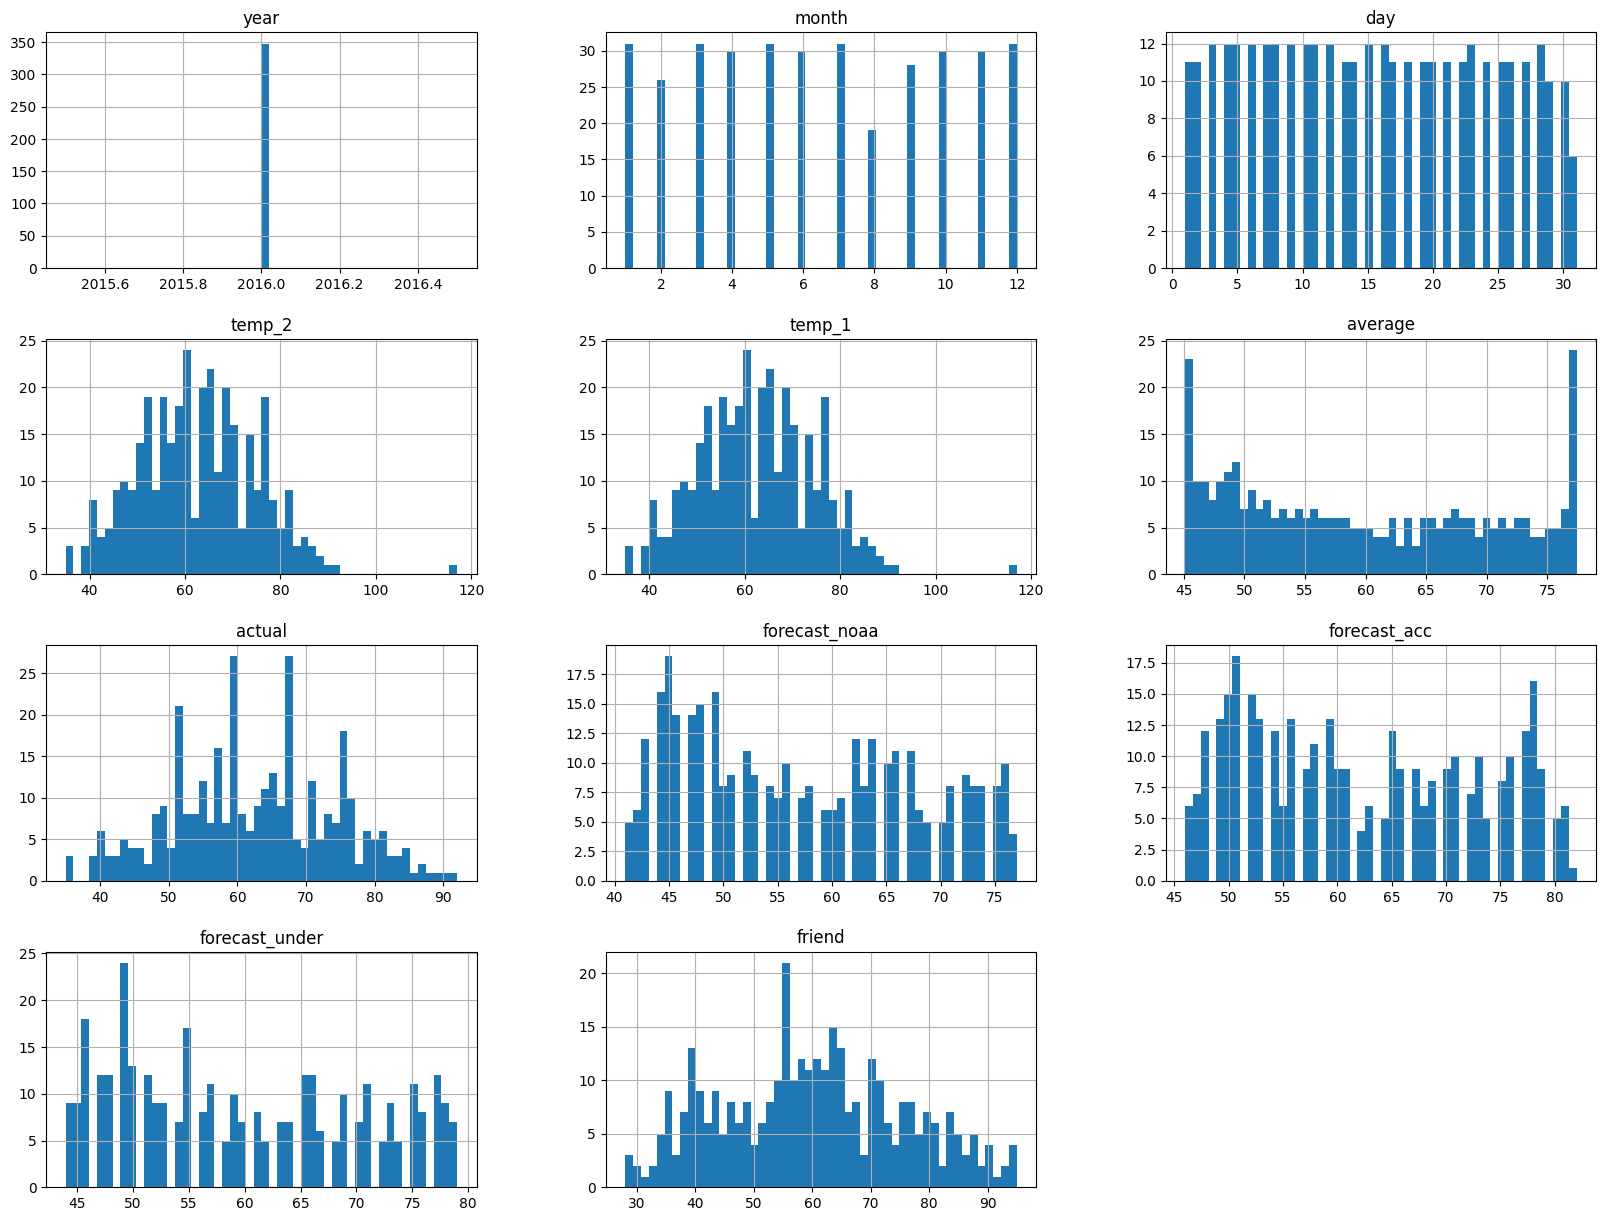

In [4]:
# agregar graficos histogramas
import matplotlib.pyplot as plt 
df.hist(bins=50, figsize=(20,15))
plt.show()


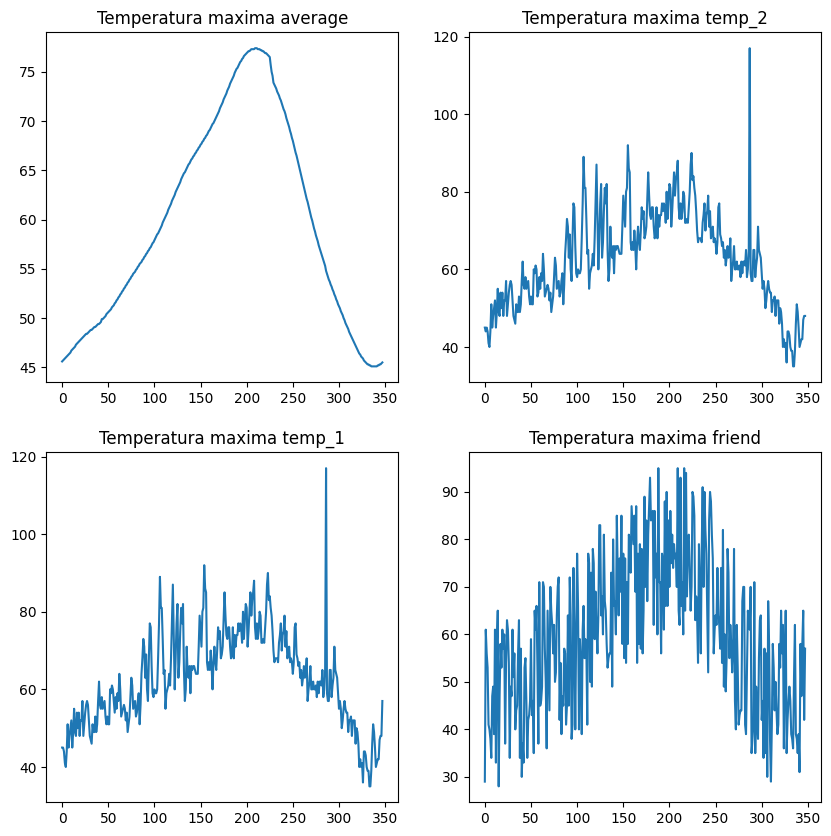

In [6]:
# 2. Realice un análisis gráfico de las temperaturas máximas históricas, las
# temperaturas de los dos días anteriores y la estimación del amigo, con
# respecto a la fecha. Comente si hay anomalías.


list = ['average', 'temp_2', 'temp_1', 'friend']
i=1
plt.figure(figsize=(10, 10))
for col in list:
    plt.subplot(2, 2, i)
    plt.plot(df[col])
    plt.title(f'Temperatura maxima {col}')
    i+=1
plt.show()


In [7]:
# 3. Recodifique los días de la semana, creando siete variables 1-0 asociados
# a los días de la semana. Le puede facilitar el proceso usando get_dummies de la librería Pandas.


df.drop(columns=['forecast_noaa', 'forecast_acc', 'forecast_under'], inplace=True)

df = pd.get_dummies(df, columns=['week'])
df.head()


,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,True,False,False,False,False,False,False
1,2016,1,2,44,45,45.7,44,61,False,False,True,False,False,False,False
2,2016,1,3,45,44,45.8,41,56,False,False,False,True,False,False,False
3,2016,1,4,44,41,45.9,40,53,False,True,False,False,False,False,False
4,2016,1,5,41,40,46.0,44,41,False,False,False,False,False,True,False


In [9]:
# 4. Ahora, separe los datos en predictores y variable respuesta. Su variable
# Y es la temperatura máxima real y los predictores son todas las
# columnas que usa el modelo para hacer una predicción. Asegúrese de
# transformar en una matriz Numpy porque esa es la forma en que
# funciona el algoritmo.

X = df.drop(columns=['actual'])
y = df['actual']

X = np.array(X)
y = np.array(y)



In [11]:
# 5. Separe su base en entrenamiento y testeo en 75/25. Use una semilla 
# (random_state = 42) para obtener los mismos valores.


X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)




(261, 14)
(87, 14)
(261,)
(87,)


In [12]:
# 6. Cree una línea de base, es decir, el error que obtendremos si
# simplemente predijéramos la temperatura máxima promedio para
# todos los días.

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_pred = np.full(y_test.shape, y_train.mean())
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))




MAE: 9.581758928964636
MSE: 139.4588599697597
RMSE: 11.809270086239865
R2: -0.0028045577203292815


In [13]:
# 7. Ajuste un modelo de regresión de bosque aleatorio con los datos de
# entrenamiento. Implemente 1000 árboles y use la misma semilla
# declarada en el punto 5.

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)




RandomForestRegressor(n_estimators=1000, random_state=42)

In [15]:
#8. Obtenga la predicción. Coméntalo.

y_pred = rf.predict(X_test)

print(y_pred)
print()
print('la prediccion es un array de 365 valores, uno por cada dia del año cada valor es la prediccion de la temperatura maxima para ese dia.')

[68.546 60.784 51.793 60.927 65.881 70.528 80.896 78.619 62.719 73.128
 63.602 72.64  38.659 62.429 71.211 56.202 60.822 56.842 57.348 76.862
 64.103 54.39  65.619 62.349 58.085 52.536 67.117 47.089 61.673 78.307
 73.671 64.337 55.865 80.073 73.967 61.824 53.672 50.83  68.275 43.457
 70.446 57.512 76.381 42.691 61.097 73.52  52.555 79.064 54.275 42.529
 46.701 42.727 64.663 65.748 74.633 61.44  55.451 59.685 53.377 59.33
 66.457 50.433 60.308 70.522 59.998 58.837 71.399 69.518 75.912 40.739
 78.394 56.005 60.448 49.8   54.326 63.446 43.876 76.366 48.199 52.312
 53.308 68.748 73.033 73.27  63.059 58.739 46.929]

la prediccion es un array de 365 valores, uno por cada dia del año cada valor es la prediccion de la temperatura maxima para ese dia.


In [17]:
# 9. Obtenga las métricas de precisión.

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))
print()

# Comente:
print ('El error de la linea base es mayor que el error del modelo de regresion de bosque aleatorio, por lo que el modelo de regresion de bosque aleatorio es mejor que la linea base.')




MAE: 3.834172413793103
MSE: 25.399714471264364
RMSE: 5.039812940106445
R2: 0.8173586859802092

El error de la linea base es mayor que el error del modelo de regresion de bosque aleatorio, por lo que el modelo de regresion de bosque aleatorio es mejor que la linea base.


In [18]:
# 10. ¿Considera que el modelo es adecuado?

print('Si, ya que el error es menor que el de la linea base.')


Si, ya que el error es menor que el de la linea base.
